<h1 align=center>  Predictions


In [1]:
#Loading libraries
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

Using TensorFlow backend.
C:\Users\hanit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hanit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hanit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hanit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
face_classifier = cv2.CascadeClassifier(r'C:\Users\hanit\OneDrive\Desktop\Hanitha\CNN\images\haarcascade_frontalface_default.xml')

#Load the created model during training which has learned weights and learning rate
classifier =load_model(r'C:\Users\hanit\OneDrive\Desktop\Hanitha\CNN\Emotion_little_vgg.h5')

#Naming class labels as it is there in training file
class_labels = ['Angry','disgust','fear','Happy','Neutral','Sad','Surprise']

#For live video capturing
cap = cv2.VideoCapture(0)

### Defining function for image reading and video capturing

In [3]:
def PredictResult(isVideo=True,exp_frame=None):
    if isVideo:
        cap = cv2.VideoCapture(0)
        while cap.isOpened():
            # Grab a single frame of video
            ret, frame = cap.read()
            labels = []
            Category_Box(frame)
            cv2.imshow('Emotion Detector',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        print("Camera closed")
        cap.release()
        cv2.destroyAllWindows()
    else:
        Category_Box(exp_frame)
        cv2.namedWindow('Emotion Detector', cv2.WINDOW_NORMAL)        
        cv2.imshow('Emotion Detector',exp_frame)
        cv2.waitKey(0)
        cv2.destroyWindow('Emotion Detector')

### Define a function for drawing bounding box around Region Of Interest(roi)

In [4]:
def Category_Box(frame):
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
        faces = face_classifier.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
                    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
                    roi_gray = gray[y:y+h,x:x+w]
                    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
                # rect,face,image = face_detector(frame)


                    if np.sum([roi_gray])!=0:
                        roi = roi_gray.astype('float')/255.0
                        roi = img_to_array(roi)
                        roi = np.expand_dims(roi,axis=0)

                    # make a prediction on the ROI, then lookup the class

                        preds = classifier.predict(roi)[0]
                        label=class_labels[preds.argmax()]
                        label_position = (x,y)
                        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
                    else:
                        cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)    

## Predictions

### For a picture

In [5]:
imageFrame = cv2.imread(r'C:\Users\hanit\OneDrive\Desktop\Hanitha\CNN\happy.jpg')
print('Image shape:', imageFrame.shape)  # tuple of (511, 767, 3)

# Getting spatial dimension of input image
h, w = imageFrame.shape[:2]  # Slicing from tuple only first two elements
# Check point
# Showing height an width of image
print('Image height={0} and width={1}'.format(h, w))  # 511 767
PredictResult(False,imageFrame)
save = PredictResult

cv2.imwrite(r'C:\Users\hanit\OneDrive\Desktop\Hanitha\CNN\Test-imageResult.jpg', imageFrame)

Image shape: (280, 390, 3)
Image height=280 and width=390


True

### For bunch of pictures

* The test images are listed in an array
* Created a folder called 'output' to store the resulted predicted image

In [19]:
imagearray = ['image1.jpg','image2.jpg','image3.jpg','image4.jpg','image5.jpg','image6.jpg','image7.jpg']

In [22]:
for image in imagearray:    
    imageFrame = cv2.imread(f'C:\\Users\hanit\OneDrive\Desktop\Hanitha\CNN\{image}')
    print('Image shape:', imageFrame.shape)  # tuple of (511, 767, 3)

    # Getting spatial dimension of input image
    h, w = imageFrame.shape[:2]  # Slicing from tuple only first two elements
    # Check point
    # Showing height an width of image
    print('Image height={0} and width={1}'.format(h, w))  # 511 767
    PredictResult(False,imageFrame)
    save = PredictResult

    cv2.imwrite(f'C:\\Users\hanit\OneDrive\Desktop\Hanitha\CNN\output\{image}', imageFrame)

Image shape: (955, 1300, 3)
Image height=955 and width=1300
Image shape: (530, 800, 3)
Image height=530 and width=800
Image shape: (665, 1000, 3)
Image height=665 and width=1000
Image shape: (280, 390, 3)
Image height=280 and width=390
Image shape: (360, 360, 3)
Image height=360 and width=360
Image shape: (280, 352, 3)
Image height=280 and width=352
Image shape: (234, 300, 3)
Image height=234 and width=300


## Live video

In [8]:
PredictResult(True)

Camera closed


<h3 align= center > Enjoy With Emotions

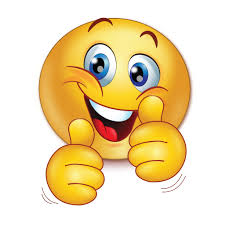